In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from classes.basic_optical_gating import BasicOpticalGating as BOG

In [23]:
sequence = "D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif"
reference_sequence = "D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif"
reference_sequence_period = "D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.txt"

sequence = "D:/Data/both 800fps/brightfield/*tif"
reference_sequence = "D:/Data/both 800fps/ref_seq.tif"
reference_sequence_period = "D:/Data/both 800fps/ref_seq.txt"


og = BOG()
og.logger.set_normal()
#og.settings["matching_method"] = "SSD"
og.set_sequence(sequence)
og.set_reference_sequence(reference_sequence)
og.set_reference_period(reference_sequence_period)
og.run()


og_lf = BOG()
og_lf.logger.set_normal()
#og.settings["matching_method"] = "SSD"
og_lf.set_sequence(sequence)
og_lf.set_reference_sequence(reference_sequence)
og_lf.set_reference_period(reference_sequence_period)
og_lf.reduce_reference_framerate(8)
og_lf.run()

BOG i Loading sequence...
BOG ✓ Sequence loaded with 2000 frames
BOG i Loading reference sequence...
BOG ✓ Reference sequence loaded with 311 frames
BOG i Setting reference period to 306.26237218280687
BOG i Calculating SADs...
BOG ✓ SADs calculated
BOG i Calculating phases...
BOG ⚠ Subframe minima outside range -1.1809516251216252 setting to -0.5
BOG ⚠ Subframe minima outside range -1.2729505820253615 setting to -0.5
BOG ⚠ Subframe minima outside range -1.6514048293934018 setting to -0.5
BOG ⚠ Subframe minima outside range 1.5274655414209617 setting to 0.5
BOG ⚠ Subframe minima outside range 1.2389907874583628 setting to 0.5
BOG ⚠ Subframe minima outside range 1.19413485171044 setting to 0.5
BOG ⚠ Subframe minima outside range 0.5532822826707683 setting to 0.5
BOG ⚠ Subframe minima outside range 0.5189023782546307 setting to 0.5
BOG ✓ Phases calculated
BOG i Calculating delta phases...
BOG ✓ Delta phases calculated
BOG i Unwrapping phases...
BOG ✓ Unwrapped phases calculated
BOG ✓ Fin

(-0.5, 2.0, 1.0, 2.0, 3.0)


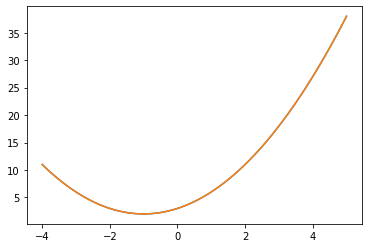

In [4]:
def quadratic(x, a, b, c):
    return a*x**2 + b*x + c


def u_fittingN(xs, ys):
    # Quadratic best fit to N datapoints, which [** inconsistently with respect to u/v_fitting() **]
    # are considered to be at coordinates x=0, 1, ...
    import scipy.optimize

    (a, b, c), cov = scipy.optimize.curve_fit(quadratic, xs, ys, p0=[0, 0, np.average(ys)])
    x = -b / (2*a)
    y = quadratic(x, a, b, c)
    #    return x, y, *popt
    return x / 2, y, a, b, c


xs = np.linspace(-4,5,100)
ys = quadratic(xs, 1, 2, 3)

plt.plot(xs, ys)

fit = (u_fittingN(xs, ys))
print(fit)

plt.plot(xs, quadratic(xs, fit[2], fit[3], fit[4]))

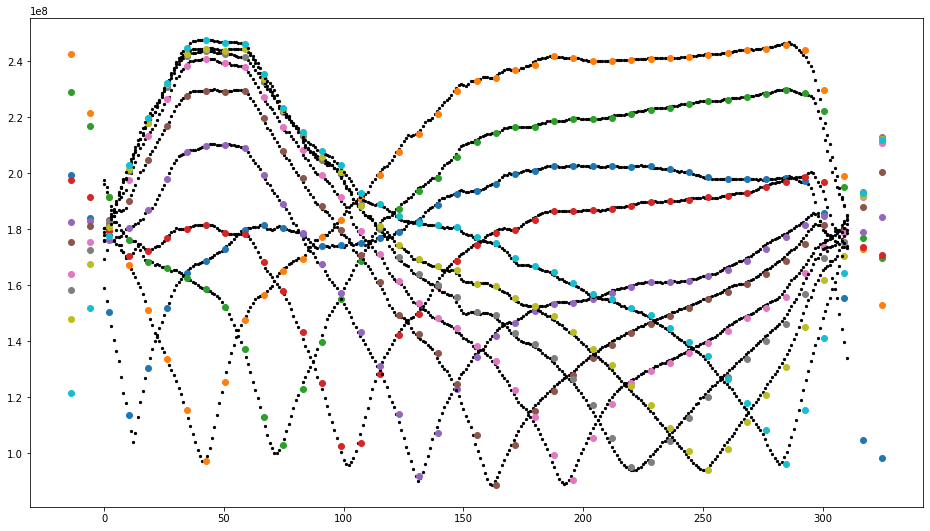

In [45]:
plt.figure(figsize = (16,9))
for i in range(430, 730, 30):
    plt.scatter(range(og.sads[i].shape[0]), og.sads[i], s = 5, c = "black")
    minima = np.argmin(og_lf.sads[i][2:-2]) + 2
    plt.scatter(np.linspace(-14, og.sads[i].shape[0] + 14, og_lf.sads[i].shape[0]), og_lf.sads[i])

plt.show()